In [238]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

house_data = pd.read_csv('data.csv')
print(house_data.shape)

print(house_data.keys())
house_data.head()

(4600, 18)
Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [239]:
house_data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [240]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


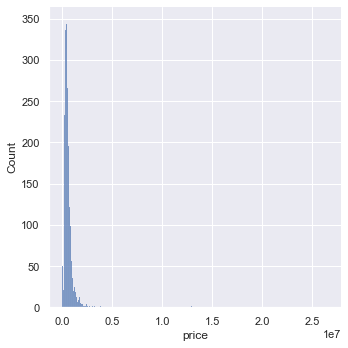

In [241]:
sns.set_theme()
sns.displot(house_data['price'])
plt.show()

In [242]:
house_data = house_data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated']]
house_data = house_data.astype(int)

In [243]:
def year_built(house_data):
    if house_data['yr_built'] < house_data['yr_renovated']:
        return house_data['yr_renovated']
    else:
        return house_data['yr_built']
    
    
house_data['year_built'] = house_data.apply(year_built, axis = 1)




In [244]:
house_data.drop(columns = ['yr_built', 'yr_renovated'], inplace = True)

In [245]:
house_data.drop(index = house_data[house_data['price'] == 0].index, inplace = True)

In [246]:
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4551.0,557905.885959,563929.874935,7800.0,326264.0,465000.0,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.0,3.0,4.0,9.0
bathrooms,4551.0,1.782905,0.744431,0.0,1.0,2.0,2.0,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.0,1970.0,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.0,7680.0,10978.0,1074218.0
year_built,4551.0,1986.942650,25.422954,1900.0,1976.0,1996.0,2005.0,2014.0


In [247]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   price        4551 non-null   int32
 1   bedrooms     4551 non-null   int32
 2   bathrooms    4551 non-null   int32
 3   sqft_living  4551 non-null   int32
 4   sqft_lot     4551 non-null   int32
 5   year_built   4551 non-null   int64
dtypes: int32(5), int64(1)
memory usage: 160.0 KB


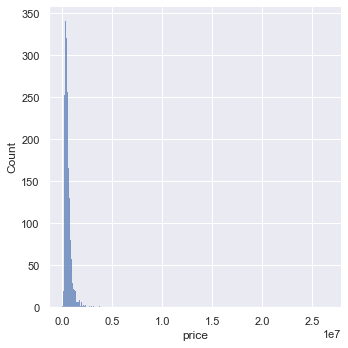

In [248]:
sns.set_theme()
sns.displot(house_data['price'])
plt.show()

<AxesSubplot:>

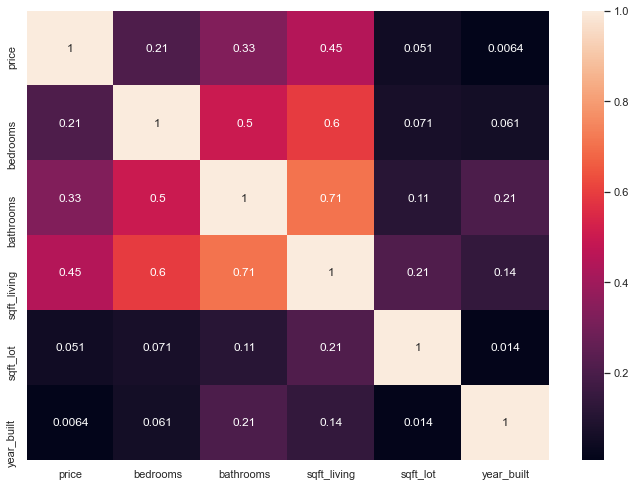

In [249]:
corr_matrix = house_data.corr()
sns.heatmap(data=corr_matrix, annot=True)

<Figure size 720x360 with 0 Axes>

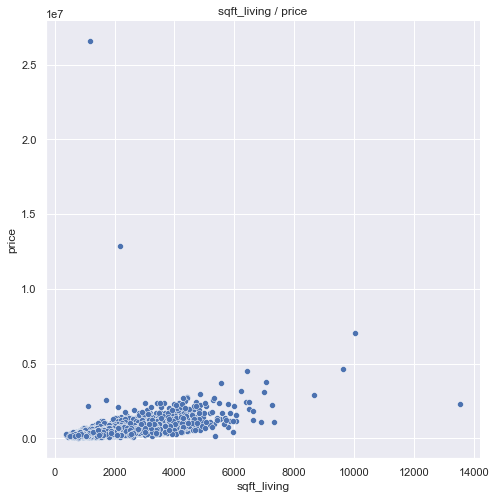

In [250]:
plt.figure(figsize = (10, 5))
sns.pairplot(house_data, x_vars = ['sqft_living'], y_vars = ['price'], height = 7, kind = 'scatter')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('sqft_living / price')
plt.show()

In [251]:
house_data.drop(index = house_data[house_data['price'] > 7000000].index, inplace = True)
house_data.drop(index = house_data[house_data['sqft_living'] > 10000].index, inplace = True)

<Figure size 720x360 with 0 Axes>

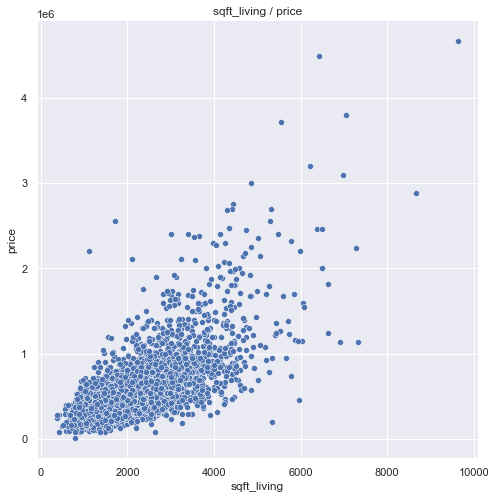

In [252]:
plt.figure(figsize = (10, 5))
sns.pairplot(house_data, x_vars = ['sqft_living'], y_vars = ['price'], height = 7, kind = 'scatter')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('sqft_living / price')
plt.show()

In [253]:
X = house_data.drop(columns = ['price'])
y = house_data['price']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100) 

In [254]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [255]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [256]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [257]:
y_pred = lin_reg.predict(X_test)

In [258]:
from sklearn.metrics import r2_score, mean_squared_error

In [259]:
mse = mean_squared_error(y_test, y_pred)

In [260]:
r2 = r2_score(y_test, y_pred)

In [261]:
print('Mean squared error : ', mse)
print('r square : ', r2)

Mean squared error :  64885146438.627625
r square :  0.5264582094694047


In [262]:
print('Intercept of the model : ', lin_reg.intercept_)
print('Coefficient of the line : ', lin_reg.coef_)

Intercept of the model :  544678.2438717787
Coefficient of the line :  [-52615.14703095  20394.33096428 266775.69647215 -25352.83189157
 -41907.49601148]
